## 验证数据生成
运行data/gen_data.ipynb生成虚拟验证数据

## 训练


为了快速看结果，用的小image

In [5]:
!lr=0.00001 image_size=64 batch_size=512  num_workers=16 epochs=10  python ../train.py

<class '__main__.TrainerDR'>
running_uuid 20230816_011553
<TrainerConfig: {"debug": false, "load_pretrain": null, "batch_size": 512, "epochs": 10, "image_size": 64, "lr": 1e-05, "device": "cuda:0", "num_workers": 16, "model": "convnext_tiny"}>
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 1e-05
    lr: 1e-05
    maximize: False
    weight_decay: 1e-05
)
epoch train mat  0 loss: 0.6739757061004639 type: train matrix epoch: 0 
Test epoch 0 loss: 0.4323374629020691 type: test matrix epoch: 0 
epoch train mat  1 loss: 0.3668389320373535 type: train matrix epoch: 1 
Test epoch 1 loss: 0.1505230963230133 type: test matrix epoch: 1 
epoch train mat  2 loss: 0.19515272974967957 type: train matrix epoch: 2 
Test epoch 2 loss: 0.09344722330570221 type: test matrix epoch: 2 
epoch train mat  3 loss: 0.1376749575138092 type: train matrix epoch: 3 
Test epoch 3 loss: 0.06878665089607239 type: test matrix epoch: 3 
epoch train mat  4 loss: 0.11488

## 测试结果是否符合预期

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = pickle.load(open('./logs/TrainerDR_last/preds_9.pkl', 'rb'))

In [9]:
data

{'loss': tensor([0.0489, 0.0603, 0.0609, 0.0719, 0.0534, 0.0649, 0.0510, 0.0526, 0.0551,
         0.0306, 0.0644, 0.0531, 0.0533, 0.0220, 0.0304, 0.0298, 0.0425, 0.0201,
         0.0407, 0.0383]),
 'pdf': tensor([[0.0000e+00, 1.1810e-05, 1.5294e-05,  ..., 9.9998e-01, 9.9998e-01,
          9.9998e-01],
         [0.0000e+00, 1.2537e-04, 1.5406e-04,  ..., 9.9844e-01, 9.9846e-01,
          9.9849e-01],
         [0.0000e+00, 1.8667e-05, 2.2813e-05,  ..., 8.0311e-01, 8.1698e-01,
          8.3037e-01],
         ...,
         [0.0000e+00, 6.9092e-06, 8.5398e-06,  ..., 9.9998e-01, 9.9998e-01,
          9.9998e-01],
         [0.0000e+00, 2.5183e-05, 3.1212e-05,  ..., 9.9995e-01, 9.9995e-01,
          9.9995e-01],
         [0.0000e+00, 7.6945e-05, 1.9056e-04,  ..., 9.9991e-01, 9.9992e-01,
          9.9992e-01]]),
 't1': tensor([0, 6, 4,  ..., 2, 4, 3]),
 't2': tensor([3, 6, 4,  ..., 2, 7, 7]),
 'gt': tensor([7, 2, 1,  ..., 4, 5, 6])}

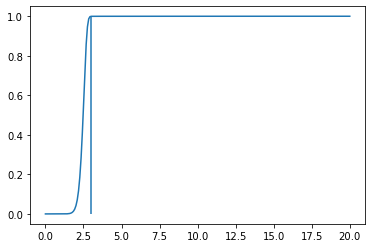

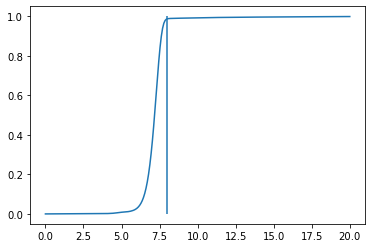

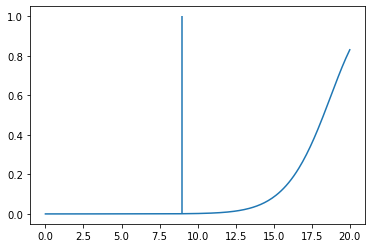

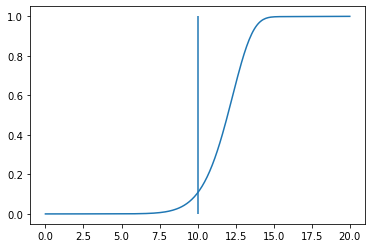

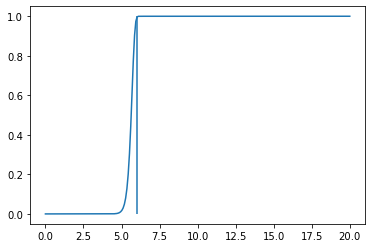

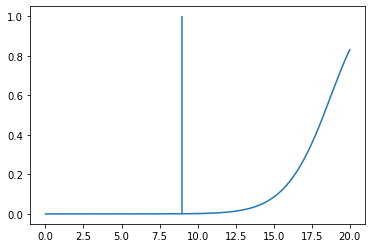

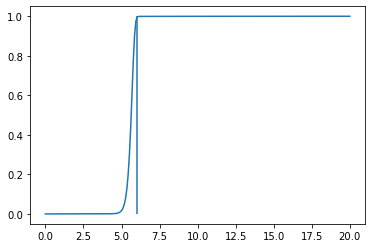

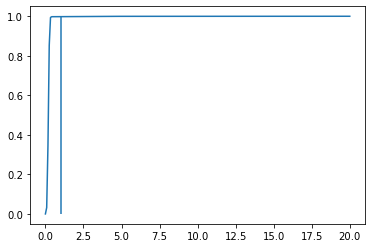

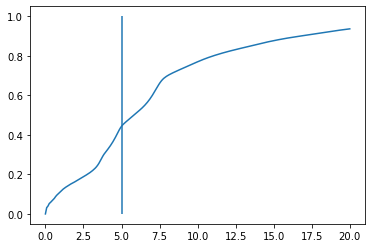

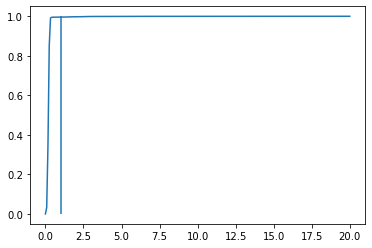

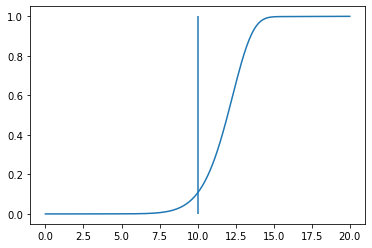

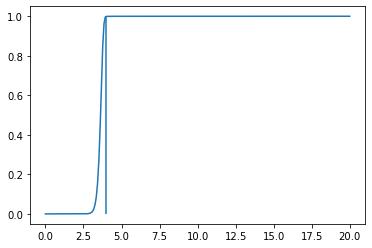

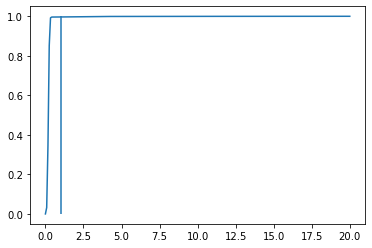

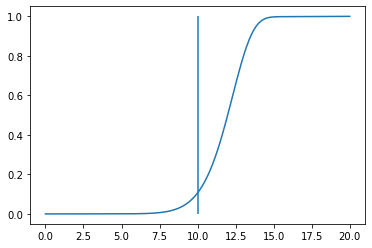

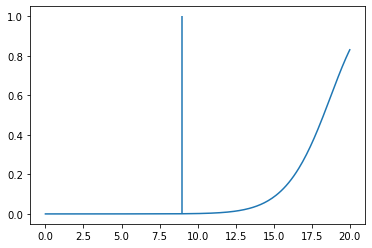

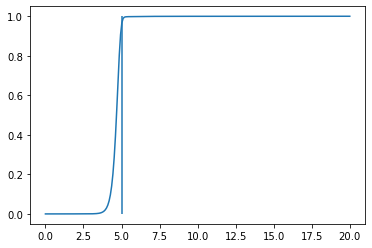

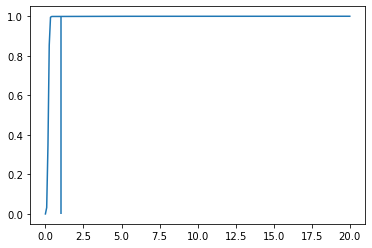

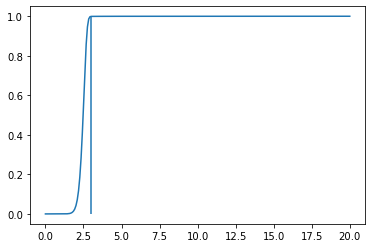

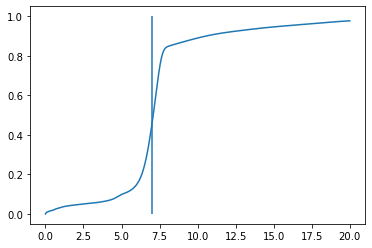

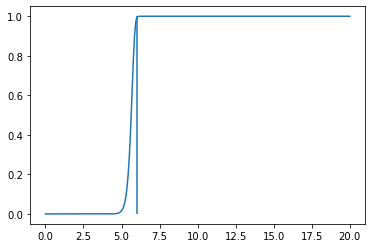

In [10]:
for i in range(20):
    plt.plot(np.linspace(0, 20, 240), data['pdf'][i])
    plt.vlines(10-data['gt'][i],0,1)
    plt.show()